In [1]:
import numpy as np
import scipy
import time
import math
from scipy.stats import norm

import mystic
from mystic.solvers import DifferentialEvolutionSolver, diffev2
from mystic.strategy import Best1Bin
from mystic.monitors import Monitor,VerboseMonitor

from copy import deepcopy

from Tomography import *

from NestedForLoop import get_iterator
from pathlib import Path
from scipy.linalg import sqrtm

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import os
import glob

import pandas as pd

from scipy.optimize import least_squares

import fnmatch
from Efficiencies import finding_file, get_channels_eff, set_raw_counts
from Optimization import Optimizer, function_fidelity, FidelityResults
from constants import *

from DensityMatrix import DensityMatrix

from pathlib import Path
import fnmatch

In [2]:
######################################################################################################
#----- COUNTING THE FILES AND SAVING THEM IN AN ARRAY TO MAKES THE REST OF THE ANALYSIS EASIER -------
######################################################################################################

n_files=0
working_dir=r"G:\Other computers\Mon ordinateur\ChannelCertification\StateTomographies\StabilityWeekEnd21052022"
os.chdir(working_dir)

filenames = [i for i in glob.glob("StateTomography*")]

index_to_file = {}

for index, filename in enumerate(filenames):
    index_to_file[n_files] = f"{filename}"
    n_files+=1

In [3]:
os.chdir(working_dir)
qubit_number=2

state = []
xp_counts_corrected_with_eff=[]

#####################################################################
#---------------------- STATE TOMOGRAPHY ----------------------------
#####################################################################

for index in range(len(index_to_file)):
    os.chdir(f"{working_dir}\\{index_to_file[index]}\\StateTomo")
    datafiles=[i for i in glob.glob("*")]
                
    ### Calculating the efficiencies of each detector
    efficiencies=get_channels_eff(datafiles, os.getcwd())

    ### Opening the data files and writing the data in counts_aux array
    counts_aux=set_raw_counts(datafiles, qubit_number, os.getcwd())
    xp_counts=np.array(np.transpose(counts_aux))

    statetomo=LRETomography(int(qubit_number), xp_counts)
    statetomo.run(correct_eff=efficiencies, print_nc=False)
    xp_counts_corrected_with_eff.append(statetomo.xp_counts)
    
    state.append(DensityMatrix(statetomo.quantum_state.get_density_matrix()))
    print('\n Fast maximum likelihood estimation: \n', state[-1], '\n')



 Fast maximum likelihood estimation: 
 array([[ 6.96629423e-04-7.15643540e-19j,  2.39355034e-03+4.15338101e-03j,
        -4.27741655e-04+5.76460856e-03j, -8.03839382e-05+1.90515369e-03j],
       [ 2.39355034e-03-4.15338101e-03j,  4.87763969e-01-2.29513705e-16j,
         4.88859845e-01+3.70332296e-02j, -6.64588634e-03+2.56433523e-03j],
       [-4.27741655e-04-5.76460856e-03j,  4.88859845e-01-3.70332296e-02j,
         5.05585023e-01+2.28687442e-16j, -2.10401048e-03-4.40494410e-03j],
       [-8.03839382e-05-1.90515369e-03j, -6.64588634e-03-2.56433523e-03j,
        -2.10401048e-03+4.40494410e-03j,  5.95437898e-03+1.54190699e-18j]]) 


 Fast maximum likelihood estimation: 
 array([[ 1.09276899e-03-7.58671390e-19j,  3.07647083e-03+9.62961377e-03j,
         3.60470551e-03+7.78198983e-03j, -1.39682444e-04-5.07823444e-04j],
       [ 3.07647083e-03-9.62961377e-03j,  4.98734234e-01-8.28196508e-17j,
         4.94639388e-01+9.60268575e-03j, -5.55396814e-03-4.85786329e-03j],
       [ 3.60470551e-03


 Fast maximum likelihood estimation: 
 array([[ 1.13145832e-03-5.44387549e-19j,  3.87354387e-03+6.96425201e-03j,
         3.00532788e-04+8.71679680e-03j, -1.00993265e-04+2.21300629e-03j],
       [ 3.87354387e-03-6.96425201e-03j,  4.88497885e-01-4.18320746e-17j,
         4.89617474e-01+3.53005893e-02j, -6.71049734e-03-1.90121204e-03j],
       [ 3.00532788e-04-8.71679680e-03j,  4.89617474e-01-3.53005893e-02j,
         5.04873520e-01+4.09627738e-17j, -3.25304749e-03-8.45526704e-03j],
       [-1.00993265e-04-2.21300629e-03j, -6.71049734e-03+1.90121204e-03j,
        -3.25304749e-03+8.45526704e-03j,  5.49713655e-03+1.41368829e-18j]]) 


 Fast maximum likelihood estimation: 
 array([[ 5.06984239e-04-6.63251075e-19j,  3.95195101e-03+6.76104230e-03j,
         1.43083317e-03+7.83343711e-03j, -2.36695050e-04+1.38498722e-03j],
       [ 3.95195101e-03-6.76104230e-03j,  4.88623052e-01+5.50933465e-17j,
         4.89216864e-01+3.66378821e-02j, -8.13874646e-03+1.49743052e-04j],
       [ 1.43083317e-03

In [4]:
######################################
#-- DEFINING THE TARGET BELL STATE ---
######################################

#bell=(np.array([1,0,0,0])+np.array([0,0,0,1]))/np.sqrt(2)
#bell=(np.array([1,0,0,0])-np.array([0,0,0,1]))/np.sqrt(2)
bell=(np.array([0,1,0,0])+np.array([0,0,1,0]))/np.sqrt(2)
#bell=(np.array([0,1,0,0])-np.array([0,0,1,0]))/np.sqrt(2)
bellmatrix=np.array(np.outer(bell, np.conjugate(bell)))

#for index in range(len(state)):
#    print(np.real(np.round(state[index].fidelity_to_pure(bell),5)))

In [5]:
##########################################################
#---------------- CALCULATING THE ERRORS -----------------
##########################################################
error_runs=1000

mu=np.zeros((n_files))
std=np.zeros((n_files))

states=state
for index in range(len(states)):

    dm = states[index]
    dm.calculate_errors(xp_counts_corrected_with_eff[index].counts_array, error_runs, bell)
    
    print('index, fidelity, fidelity_mean, fidelity_std: ',
          index, np.round(states[index].fidelity(bell),5), np.round(dm.mu,5), np.round(dm.std,5))

index, fidelity, fidelity_mean, fidelity_std:  0 (0.98553+0j) 0.9841 0.00028
index, fidelity, fidelity_mean, fidelity_std:  1 (0.99227+0j) 0.98723 0.00032
index, fidelity, fidelity_mean, fidelity_std:  2 (0.9871-0j) 0.98465 0.0003
index, fidelity, fidelity_mean, fidelity_std:  3 (0.98695+0j) 0.98249 0.0003
index, fidelity, fidelity_mean, fidelity_std:  4 (0.98748+0j) 0.98327 0.00029
index, fidelity, fidelity_mean, fidelity_std:  5 (0.9871+0j) 0.98273 0.00031
index, fidelity, fidelity_mean, fidelity_std:  6 (0.98676+0j) 0.98307 0.0003
index, fidelity, fidelity_mean, fidelity_std:  7 (0.98659+0j) 0.98332 0.00029
index, fidelity, fidelity_mean, fidelity_std:  8 (0.98689-0j) 0.98368 0.0003
index, fidelity, fidelity_mean, fidelity_std:  9 (0.98645-0j) 0.98322 0.00031
index, fidelity, fidelity_mean, fidelity_std:  10 (0.98649-0j) 0.98295 0.0003
index, fidelity, fidelity_mean, fidelity_std:  11 (0.98636+0j) 0.98198 0.00029
index, fidelity, fidelity_mean, fidelity_std:  12 (0.98645-0j) 0.98189

Text(0.5, 1.0, 'Stability of the entanglement source')

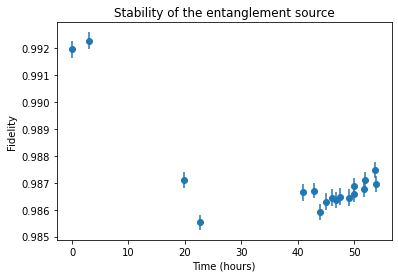

In [6]:
time=[]
ydata=np.zeros(len(states))
yerror=np.zeros(len(states))

### Converting the time label into minutes
for j in range(len(index_to_file)):
    time.append(int(index_to_file[j][-2:])/24+int(index_to_file[j][-4:-2])+24*int(index_to_file[j][-6:-4]))
first=np.min(time)

time=time-np.array([first]*len(index_to_file))
xdata=time
for index in range(len(states)):
    ydata[index]=np.real(np.round(states[index].fidelity(bell),5))
    yerror[index]=np.round(states[index].std,5)

plt.errorbar(xdata, ydata, yerror, fmt='o', label='data')
plt.ylabel('Fidelity')
plt.xlabel('Time (hours)')
plt.title('Stability of the entanglement source')